Here I use the premade modules to 
* read in, clean and 
* transform the raw input data. 

Then I evaluate the transformed data.

**The output should be a suitable input for a tensorflow CNN model.**

## Contents

[1. Dependencies](#sec1)

[2. Data cleaning](#sec2)

[3. Data labelling & image transformation](#sec3)

[4. Explore resulting images](#sec4)

## 1. Dependencies
<a id = 'sec1'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from labelled_image_preparation import data_to_labelled_img
from labels import trading_strategies
from transform  import gramian_angular_field, recurrence_plot, markov_transition_field
from visualize import ts_with_markers


## 2. Data cleaning
<a id = 'sec2'></a>

### Data related parameter settings


In [2]:
path = "../data/gemini_BTCUSD"
name = "gemini_BTCUSD"
VarName = "Close"
Freq = "2H"

#### Before cleaning : quick report

In [3]:
# data_cleaning.report()

In [4]:
data = data_cleaning.create_cleaned_set(
    file_with_path=path,
    varname=VarName,
    datename="Date",
    datetime_last="2018-08-23 01:50:00",
    freq = Freq
)

In [5]:
data.head()

,Close
Date,
2015-10-08 12:00:00,245.00
2015-10-08 14:00:00,244.92
2015-10-08 16:00:00,244.99
2015-10-08 18:00:00,244.00
2015-10-08 20:00:00,243.95


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12595 entries, 2015-10-08 12:00:00 to 2018-08-23 00:00:00
Freq: 2H
Data columns (total 1 columns):
Close    12595 non-null float64
dtypes: float64(1)
memory usage: 196.8 KB


In [7]:
data.describe()

,Close
count,12595.000000
mean,3524.131301
std,4032.958938
min,243.600000
25%,578.995000
50%,1153.920000
75%,6463.105000
max,19869.860000


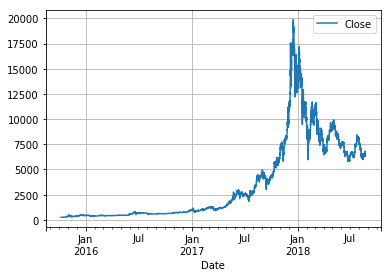

In [8]:
data.plot(grid = True)

## Data Labelling & Image transformation
<a id = 'sec3'></a>

### Decide hyperparameters of transformation

In [15]:
Label_window_size = 9
Image_window_size = 20

# image transformation strategy (will be for all)
Image_trf = ["RP", "GADF", "MTF"]

In [16]:
labelled_pd, images, image_labels, label_names = data_to_labelled_img(
    data=data, 
    column_name=VarName, 
    label_window_size = Label_window_size, 
    image_window_size = Image_window_size, 
    image_trf_strat = Image_trf,
    padding_RP = 1,
    standardize_out_RP = True,
    standardize_out_GADF = True,
    standardize_out_GASF = True    
)

In [17]:
labelled_pd.describe()

,Series
count,12595.000000
mean,3524.131301
std,4032.958938
min,243.600000
25%,578.995000
50%,1153.920000
75%,6463.105000
max,19869.860000


In [18]:
np.amax(images)

1.0

In [19]:
np.amin(images)

0.0

### Show labelled data

C:\Users\Corvinus\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


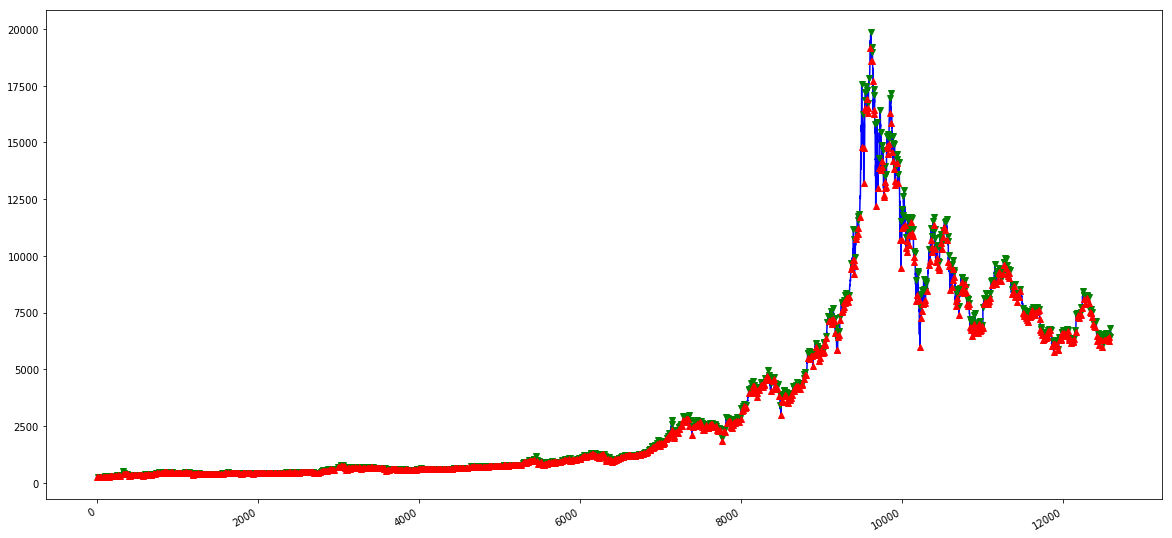

In [20]:
fig = ts_with_markers.plot_ts_markers(data = labelled_pd,
        main_col = 'Series',
        by_col = "Strategy",
        to_mark = ["Sell", "Buy"],
        color = ['g', 'r'],
        marker_type = ['v', '^']
        )
fig.set_size_inches(20, 10)
fig.show()

### Print images

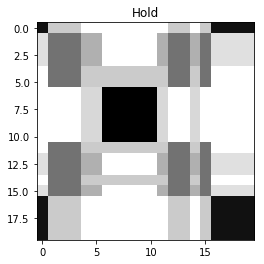

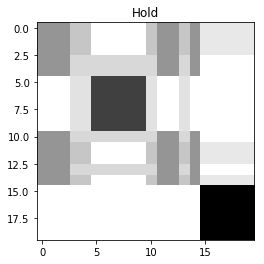

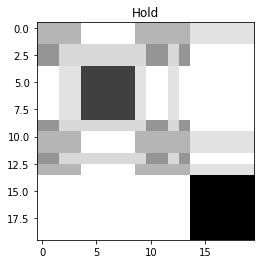

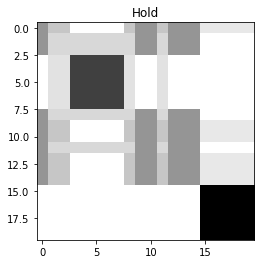

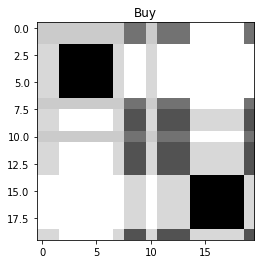

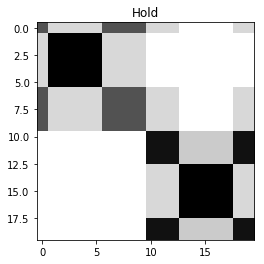

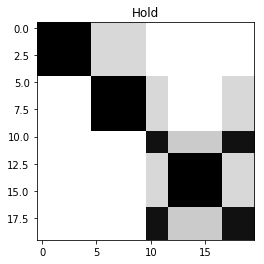

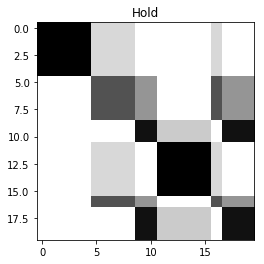

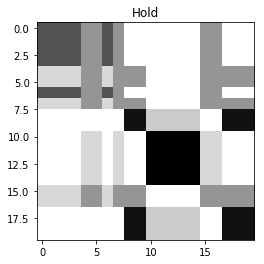

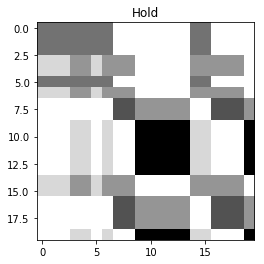

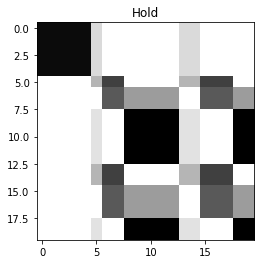

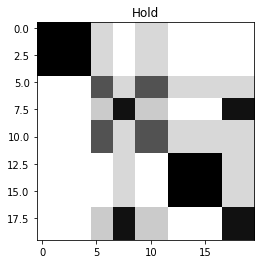

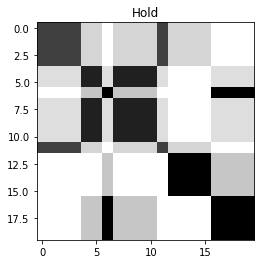

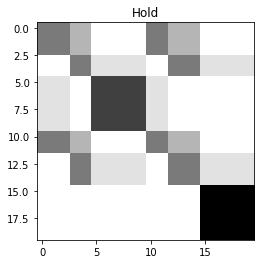

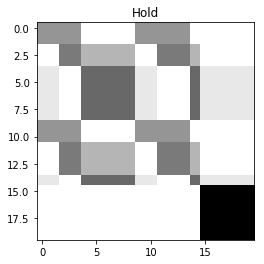

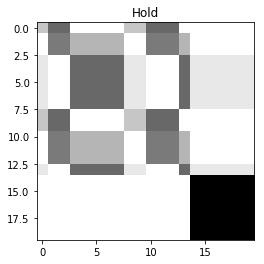

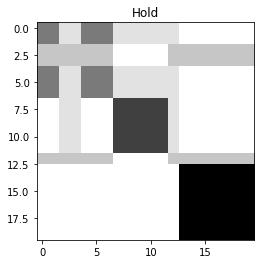

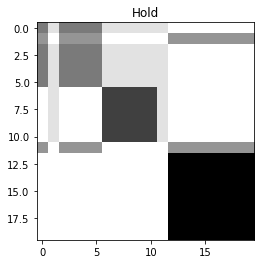

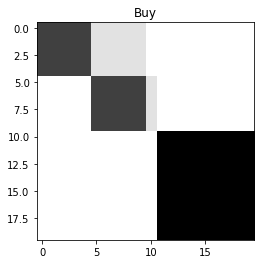

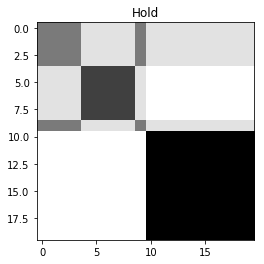

In [31]:
for idx, image in enumerate(images[2,:20]):
    plt.imshow(image, cmap = "Greys")
    plt.title(label_names[np.int(np.argwhere(image_labels[idx]))])
    plt.show()

### Labels

In [27]:
label_names

{2: 'Sell', 0: 'Buy', 1: 'Hold'}

In [28]:
image_labels.sum(axis=0)

array([ 1010, 10549,  1013], dtype=uint32)

## Save images and labels

In [29]:
np.savez('../data/cnn_input/test_'+ str(name) + "_" + str(VarName) + "_" + str(Freq) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images, image_labels = image_labels, label_names = label_names
        )